<a href="https://colab.research.google.com/github/akhilreddy-24/Fashion_GAN/blob/main/Fashion_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import dependencies and data

2.Visualize data and build dataset

3.Build Neural Network

4.Build Generator Build Discriminator

5.Construct Training loop


In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 54.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2

In [2]:
pip install matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.10.0 which is incompati

In [3]:
pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 19.7 MB/s eta 0:00:00


In [4]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
gpus

[]

In [7]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [8]:
ds=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.FD7UYJ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.FD7UYJ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
ds.as_numpy_iterator().next()['label']

2

In [10]:
#Do some data transformation
import numpy as np

In [11]:
#Setup connection
dataiterator = ds.as_numpy_iterator()

In [12]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

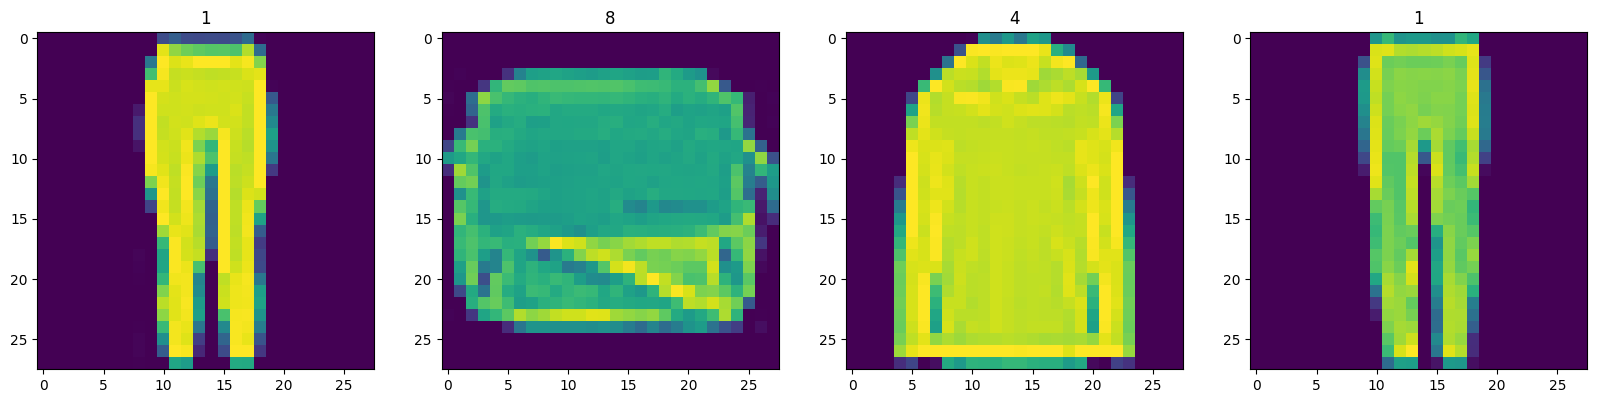

In [13]:
#Setup the subplot formatting
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  #Grab an image and lebel
  batch = dataiterator.next()
  #plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [14]:
#Scale and return images only
def scale_images(data):
  image = data['image']
  return image/255

In [15]:
# reload the dataset
ds = tfds.load('fashion_mnist',split='train')
# runnning the images through scale_images preprocessing step
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
# batch into 128 images per sample
ds = ds.batch(128)
ds = ds.prefetch(64)

In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Importing modelling components

Build Generator

Build Discriminator

In [17]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
# sequential API for Generator and Discriminator
from tensorflow.keras.models import Sequential

In [18]:
def build_generator():
  model = Sequential()
  # input layer
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

 # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

# upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

# convolutional block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

# convolutional block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

# convolutional layer
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [19]:
generator= build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [28]:
img =generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 231ms/step


array([[[[0.49571216],
         [0.49541178],
         [0.49375892],
         ...,
         [0.5052586 ],
         [0.50172997],
         [0.5007271 ]],

        [[0.49652645],
         [0.50264513],
         [0.49927893],
         ...,
         [0.50788736],
         [0.50082266],
         [0.50124407]],

        [[0.49832553],
         [0.5013225 ],
         [0.49371526],
         ...,
         [0.50282407],
         [0.5063597 ],
         [0.50240177]],

        ...,

        [[0.50074816],
         [0.50219434],
         [0.50284344],
         ...,
         [0.51045245],
         [0.5094856 ],
         [0.5003398 ]],

        [[0.5031802 ],
         [0.49824426],
         [0.5035408 ],
         ...,
         [0.50354564],
         [0.505874  ],
         [0.49967825]],

        [[0.50290877],
         [0.50109005],
         [0.50366104],
         ...,
         [0.5070397 ],
         [0.50653905],
         [0.5017048 ]]],


       [[[0.49582696],
         [0.49444756],
         [0.49

In [21]:
img.shape

(4, 28, 28, 1)

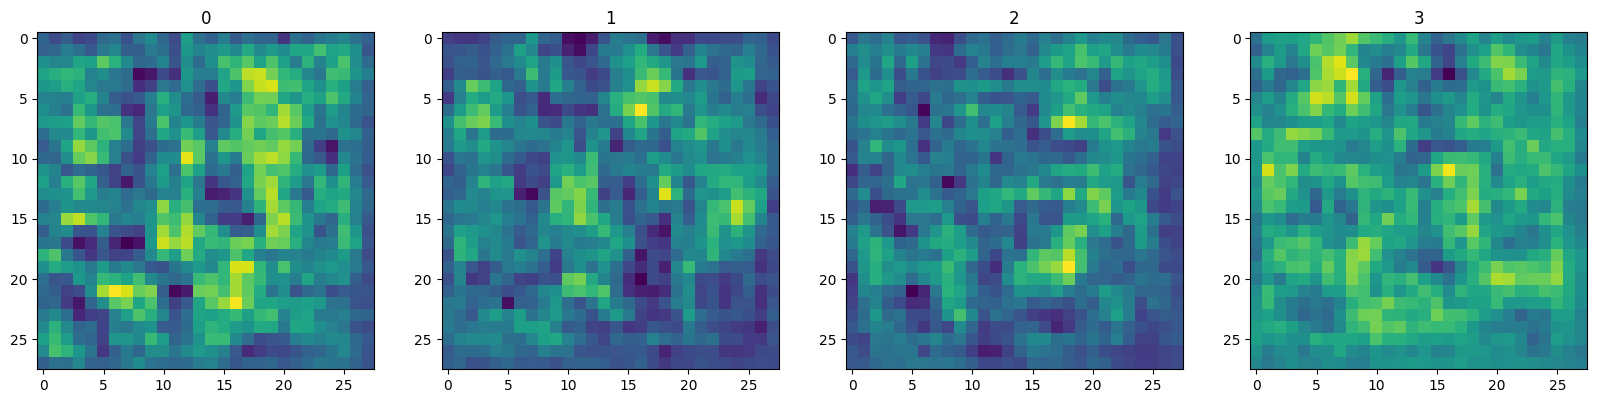

In [22]:
#Setup the subplot formatting
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  #plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [23]:
def build_discriminator():
  model = Sequential()

  #first conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #second conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [24]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [25]:
img=img[0]

In [26]:
img.shape

(28, 1)

In [29]:
discriminator.predict(img)

1/1 [==============================] - 0s 108ms/step


array([[0.4971194 ],
       [0.49711442],
       [0.49719495],
       [0.4972691 ]], dtype=float32)

Construct Training loop

1.Setup Losses and Optimizers

2.Build subclassed model

3.Build Callback

4.Train

In [30]:
#Adam is optimizer for both
from tensorflow.keras.optimizers import Adam

#binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy


In [31]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [32]:
# importing the base model class to subclass
from tensorflow.keras.models import Model

In [33]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    # create attributes for generator and discriminator
    self.generator = generator
    self.discriminator = discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    # compile with base class
    super().compile(*args,**kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self,batch):
    #  get the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training=False)

    # train the discriminator
    with tf.GradientTape() as d_tape:
      # pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images,training=True)
      yhat_fake = self.discriminator(fake_images,training=True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

      # create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      # add some noise to the true outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis=0)

      # calculate loss - binarycross
      total_d_loss = self.d_loss(y_realfake,yhat_realfake)

    # apply backpropagation - nn Learn
    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    #train the generator
    with tf.GradientTape() as g_tape:
      # generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)),training=True)

      # Create the predicted labels
      predicted_labels = self.discriminator(gen_images,training=False)

      # calculate loss - trick to training to fake out the discri\minator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    # apply backprop
    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}

In [34]:
# create instance of subclassed model
fashgan = FashionGAN(generator,discriminator)
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [35]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [36]:
class ModelMonitor(Callback):
  def __init__(self,num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

Train

In [ ]:
hist = fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
 89/469 [====>.........................] - ETA: 3:09:05 - d_loss: 0.6139 - g_loss: 0.6971

Review performance

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

Test out the Genertaor

Generate Images

In [ ]:
generator.load_weights(os.path.join('archive','generator.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(10,10))
for r in range(4):
  for c in range(4):
    ax[r,c].imshow(imgs[(r+1)*(c+1)-1])

Save the Model

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')